# Aplicación de algoritmo bayesiano

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Abril de 2023  
**Versión:** 1.0  

**Fecha de actualización:** Enero de 2025  
**Versión:** 1.1  


---

## Descripción

Este notebook contiene la explicación de la creación de un modelo de clasificación usando NaiveBayes.

Utiliza un conjunto de datos precargado de scikit-learn que tiene relación con datos de muestras de biopsias que pueden ser benignas o malignas.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Aplicación de NaiveBayes

## Conceptos previos

Es uno de los algoritmos más simples y poderosos para la clasificación basado en el Teorema de Bayes con una suposición de **independencia entre los predictores**. Naive Bayes es fácil de construir y particularmente útil para conjuntos de datos muy grandes.

Naive Bayes asume que el efecto de una característica particular en una clase es independiente de otras características. Por ejemplo, un solicitante de préstamo es deseable o no dependiendo de sus ingresos, historial de préstamos y transacciones anteriores, edad y ubicación. Incluso si estas características son interdependientes, estas características se consideran de forma independiente.

Esta suposición simplifica la computación, es por esa razón el nombre del algoritmo **Bayes ingenuo**. Formalmente, esta suposición se denomina **independencia condicional de clase**.

$P(clase|Datos) = \frac{P(Datos|clase)*P(clase)}{P(Datos)}$

Donde:
+ clase es una dalida en particular, en este caso será benigna

+ datos son las características

+ P(clase) se conoce como la **probabilidad anterior**. Es la probabilidad que ya se tiene

+ P(Datos) se conoce como **probabilidad marginal**.

+ P(clase|Datos) se conoce como **probabilidad posterior**. Es el resultado que se quiere encontrar

+ P(Datos|clase) se conoce como **verosimilitud**

### Cómo funciona

En caso de que se tenga una sola característica, el clasificador Naive Bayes calcula la probabilidad de un evento en los siguientes pasos:

+ 1 : calcular la probabilidad previa para las etiquetas de clase dadas.
+ 2 : determinar la probabilidad de probabilidad con cada atributo para cada clase.
+ 3 : poner estos valores en el teorema de Bayes y calcular la probabilidad posterior.
+ 4 : ver qué clase tiene una probabilidad más alta, dado que la variable de entrada pertenece a la clase de probabilidad más alta.

## Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.feature_selection import SelectKBest

from collections import Counter

## Carga de datos

In [ ]:
 # Carga de datos
dataset = datasets.load_breast_cancer()
data_frame = pd.DataFrame(np.c_[dataset['data'], dataset['target']], columns= np.append(dataset['feature_names'], ['target']))
data_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


+ Hay 569 observaciones con 31 columnas, siendo una de ellas la columna ‘target’ que es la que indica si es o no es cáncer.

## Descripción de la data

In [ ]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Preparación de los datos

### Revisión de nulos y tipos de datos

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

---
**Conclusión de tratamiento de nulos**

---
Se aprecia la inexistencia de valores nulos en la totalidad de las columnas

### Estandarización de nombre de columnas

In [ ]:
data_frame.columns = data_frame.columns.str.lower().str.replace(" ", "_", regex=True)
data_frame.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')

## Exploración de la data

### Descripción de clases disponibles

In [ ]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
pd.DataFrame(data_frame.groupby('target').size(), columns =['total'])

,total
target,
0.0,212
1.0,357


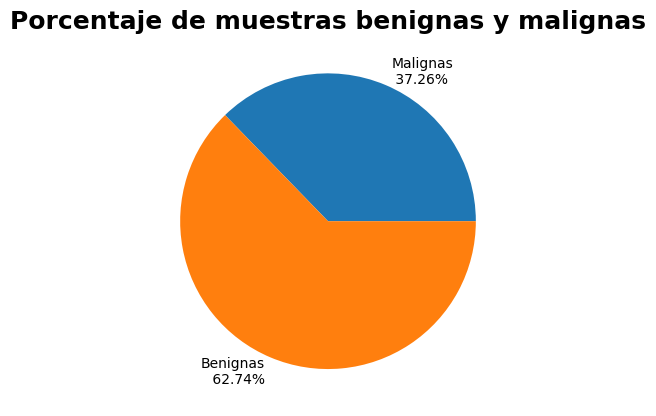

In [ ]:
# Gráfico de tortas del porcentaje de muestras benignas y malignas
# Contando las benignas
clases = np.array([data_frame[data_frame.target == 0.0].shape[0],
                   data_frame[data_frame.target == 1.0].shape[0]])

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Malignas\n ' + labels[0]
labels[1] = 'Benignas\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de muestras benignas y malignas', fontsize=18, fontweight="bold")
plt.show()

+ Se observa que hay una distribución aceptable de muestras malignas y benignas sin presentarse un mayor desbalance

### Análisis de distribución

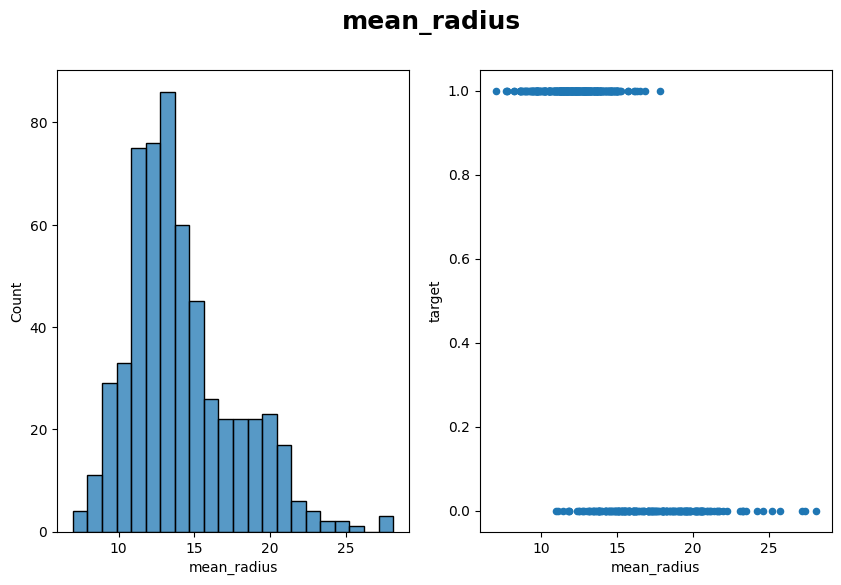

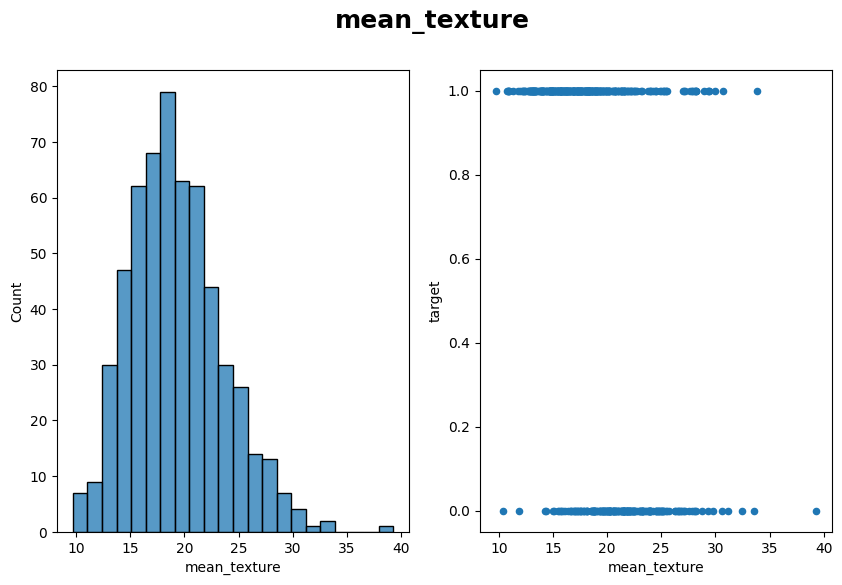

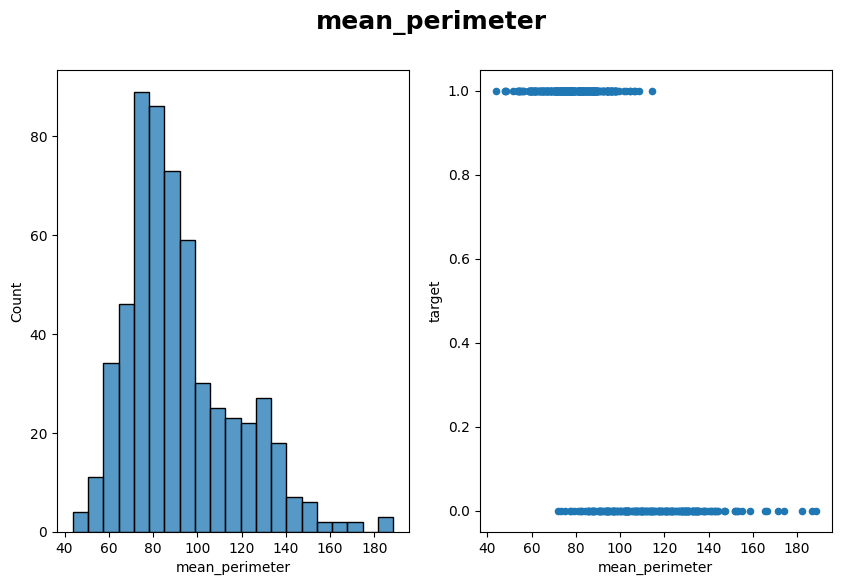

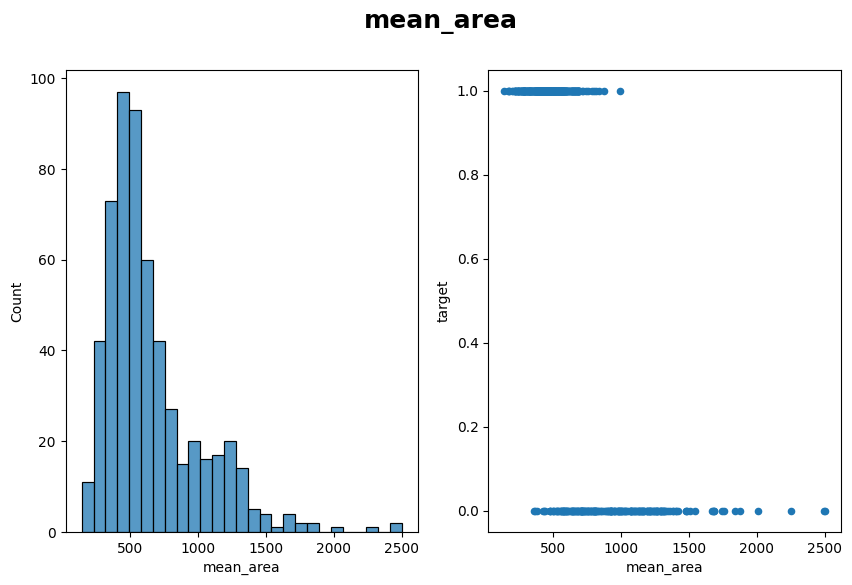

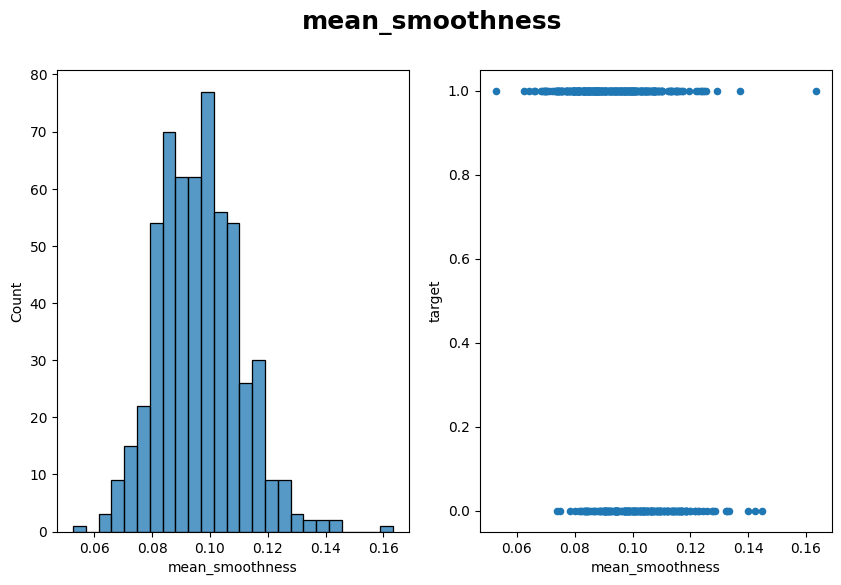

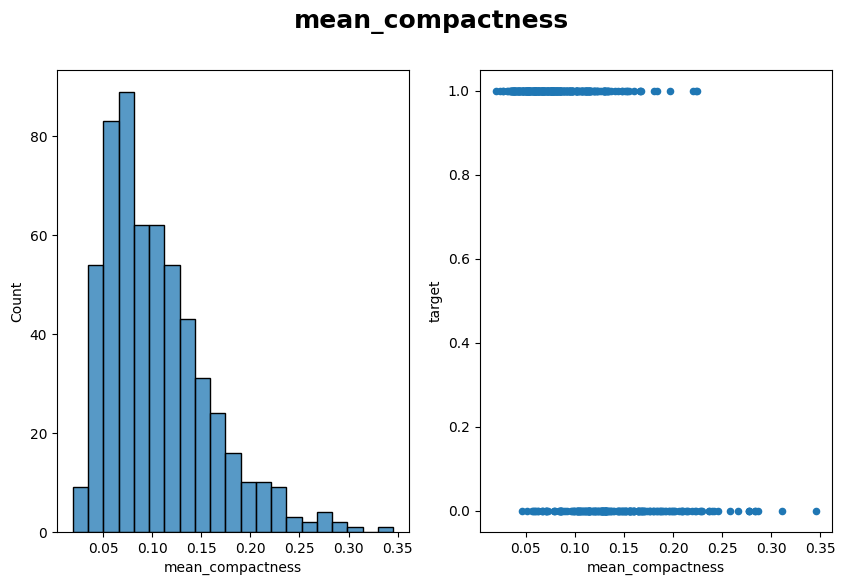

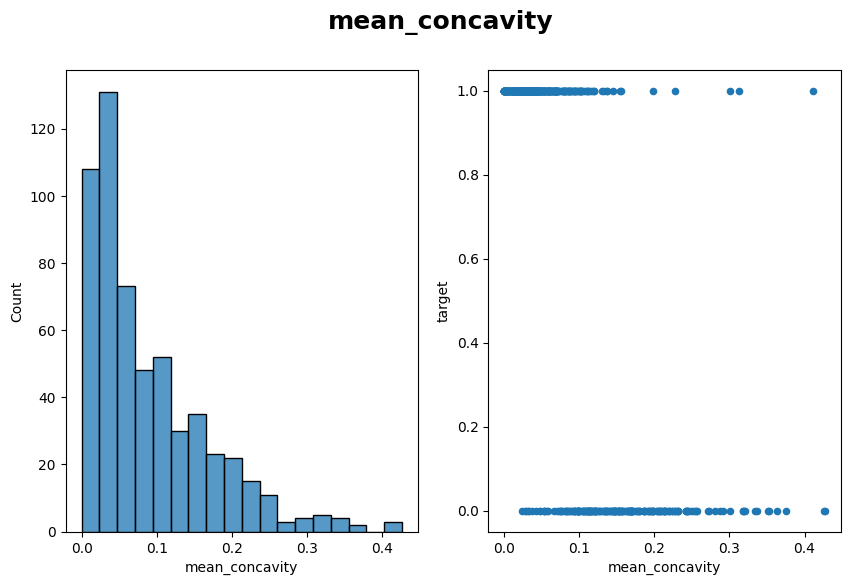

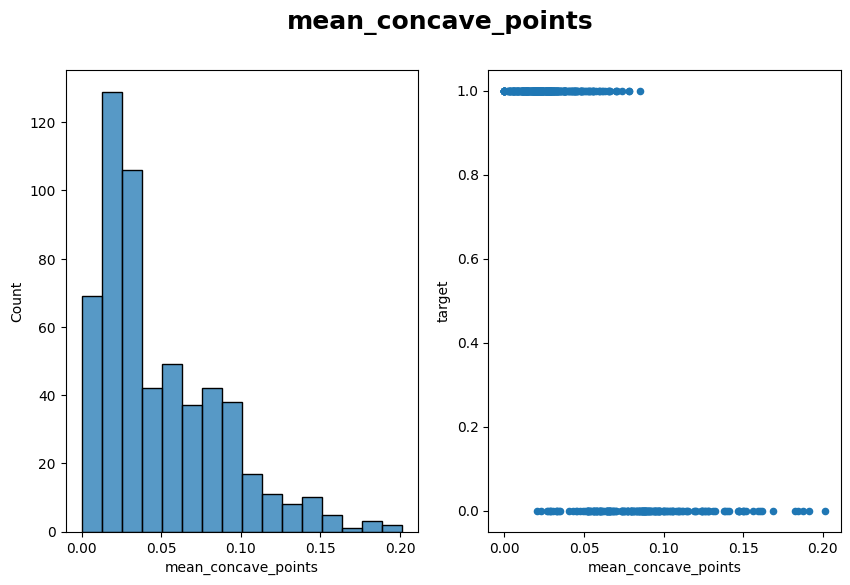

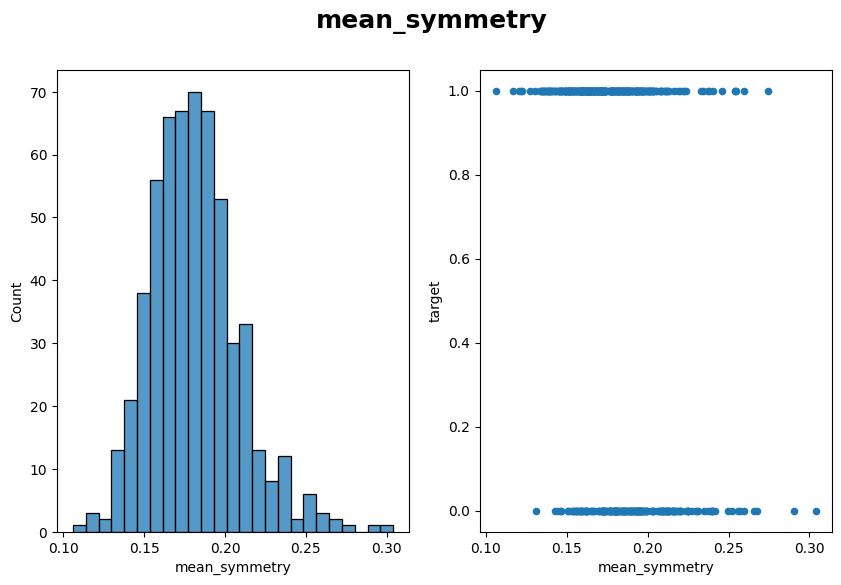

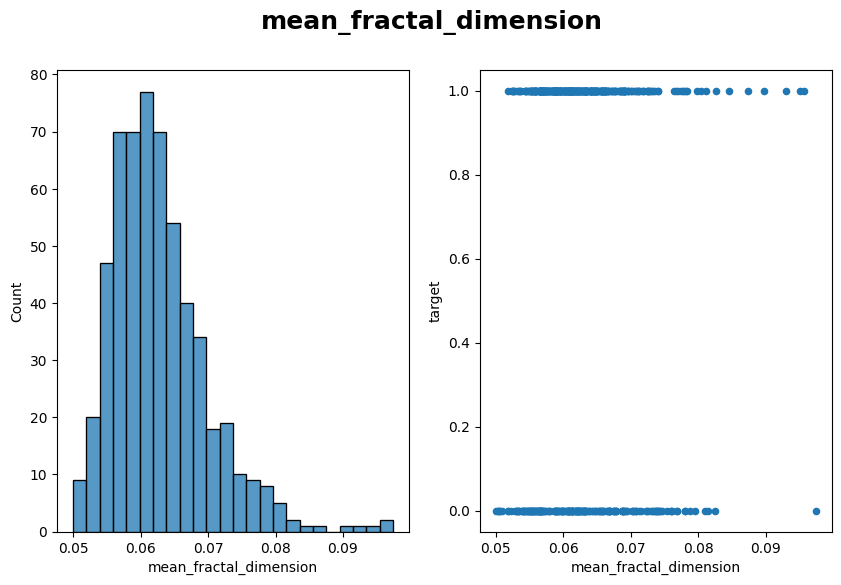

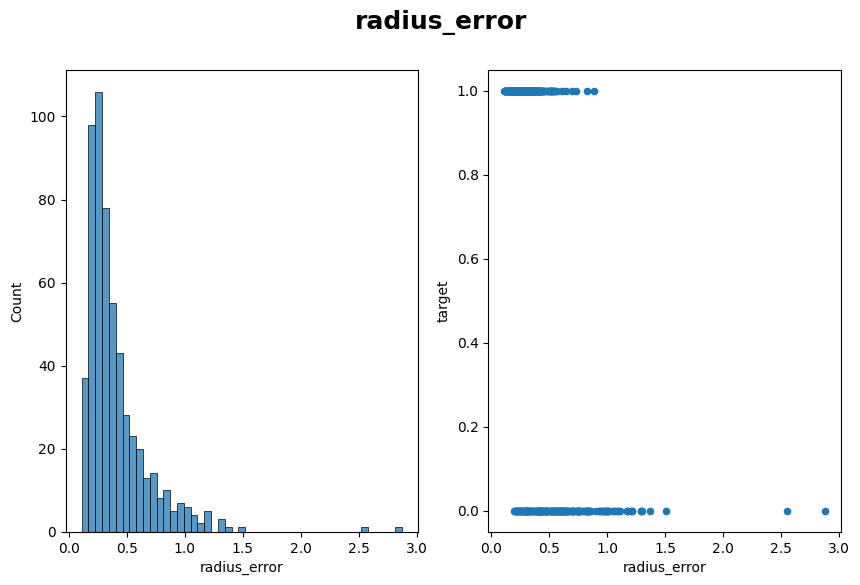

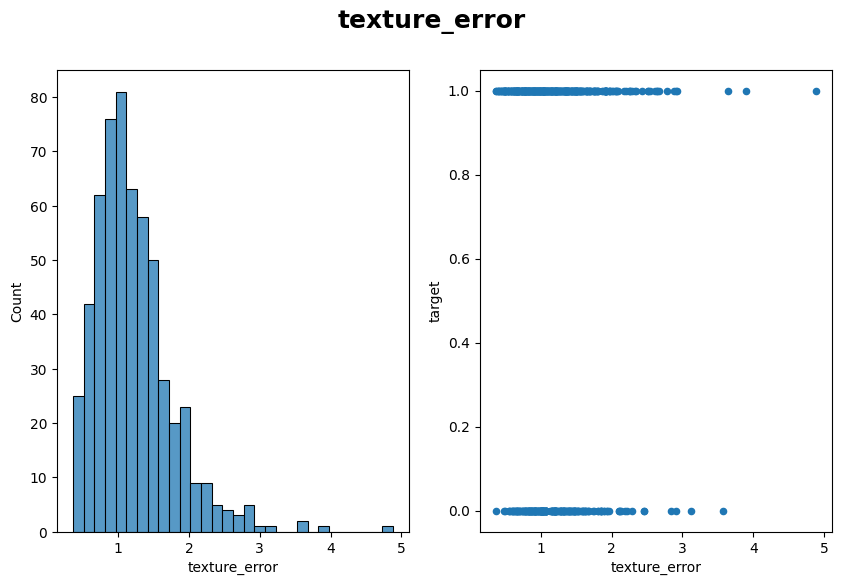

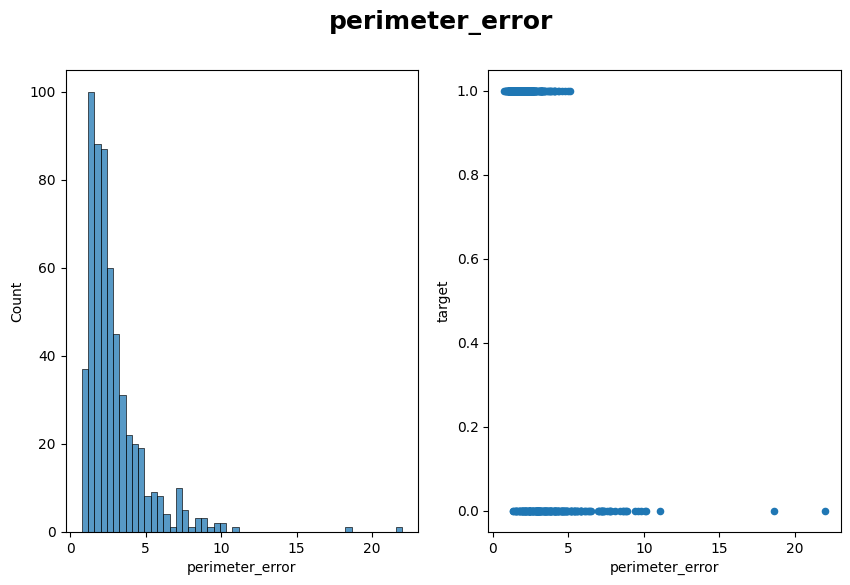

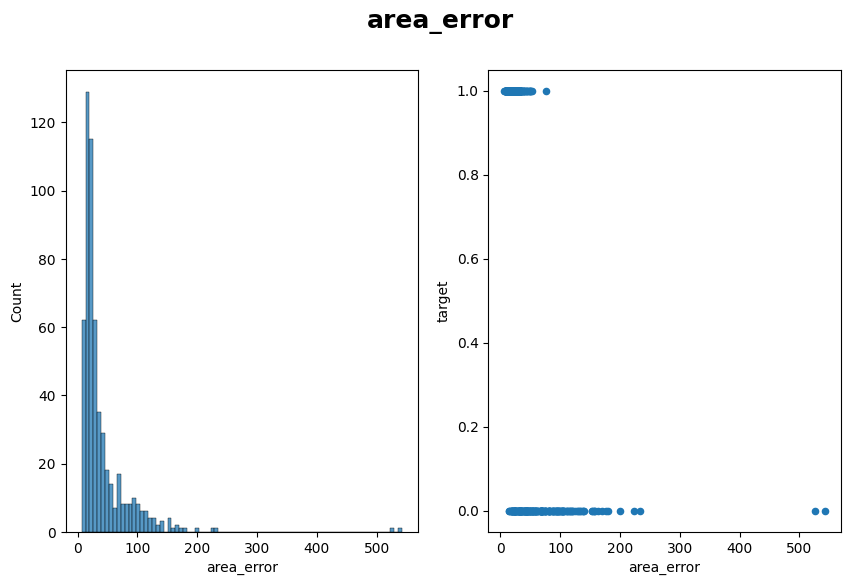

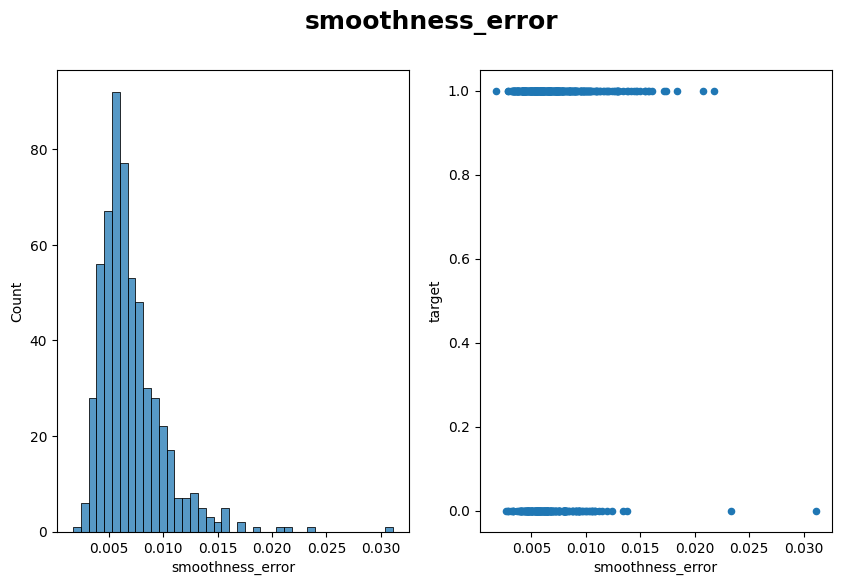

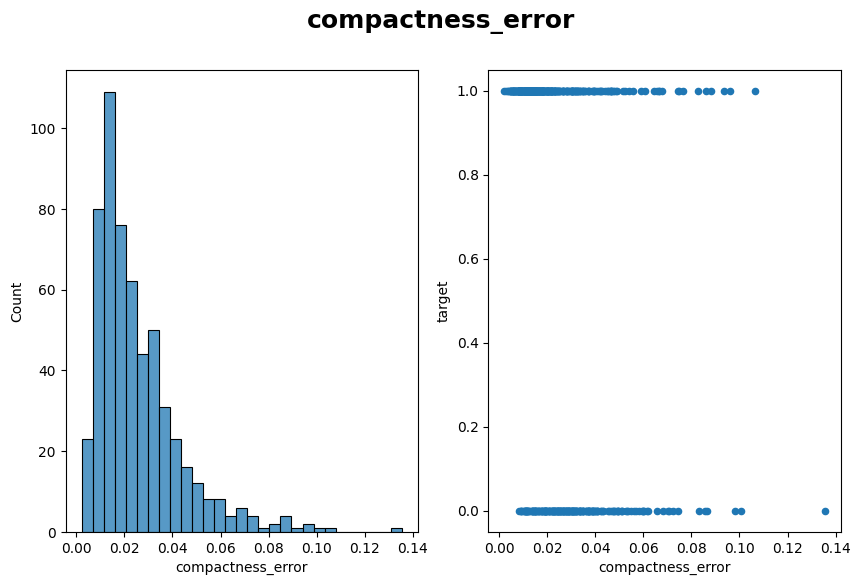

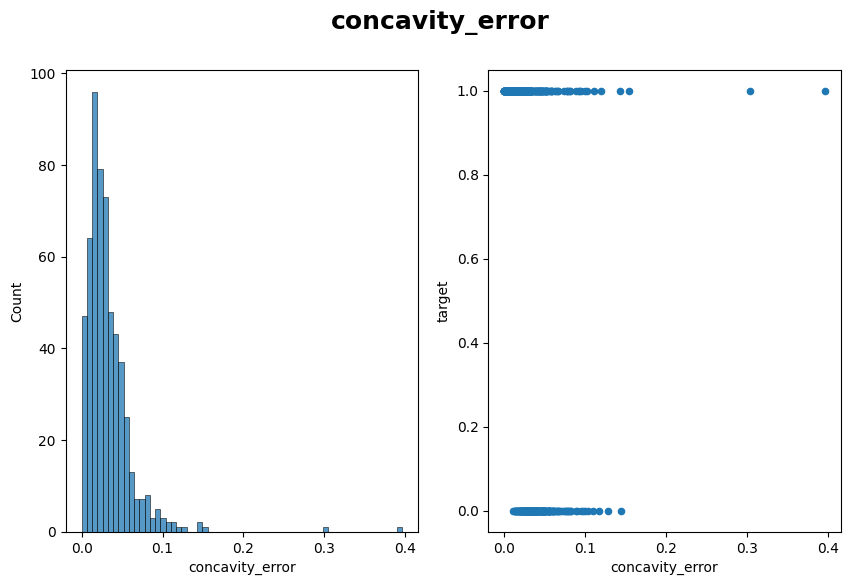

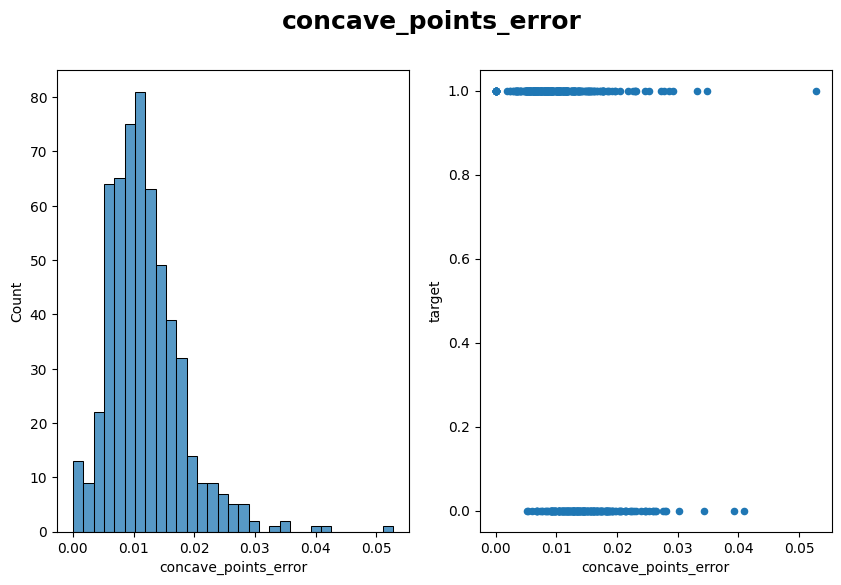

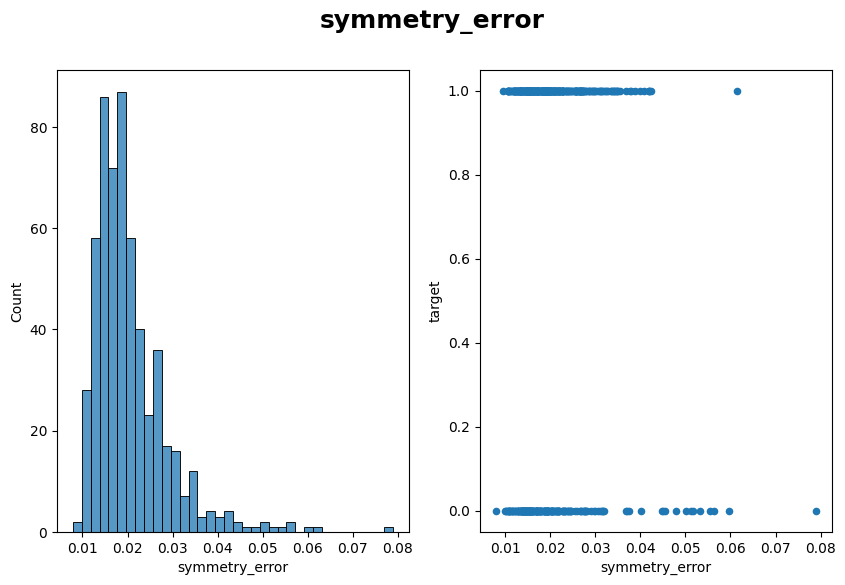

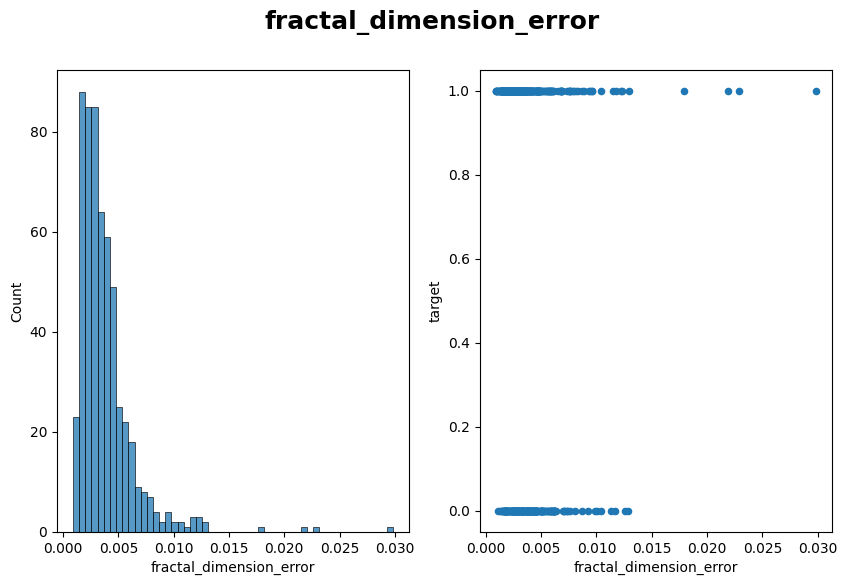

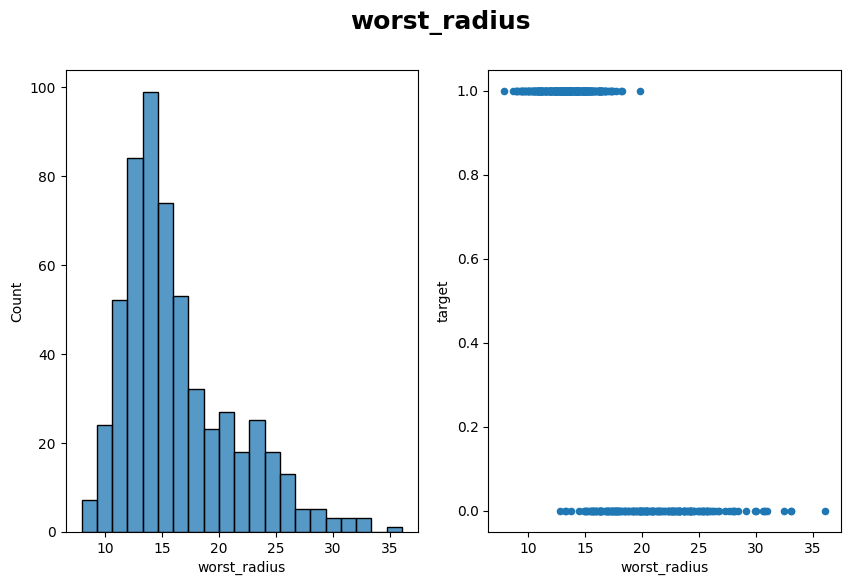

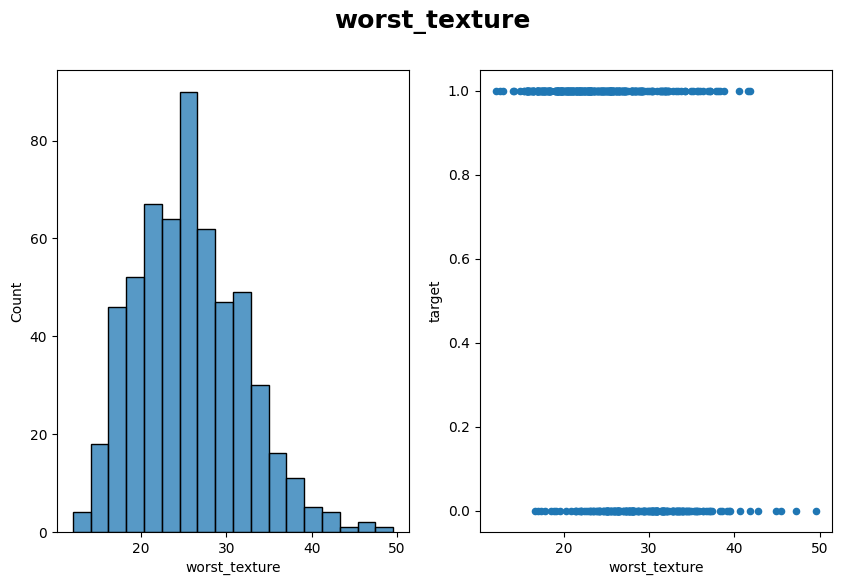

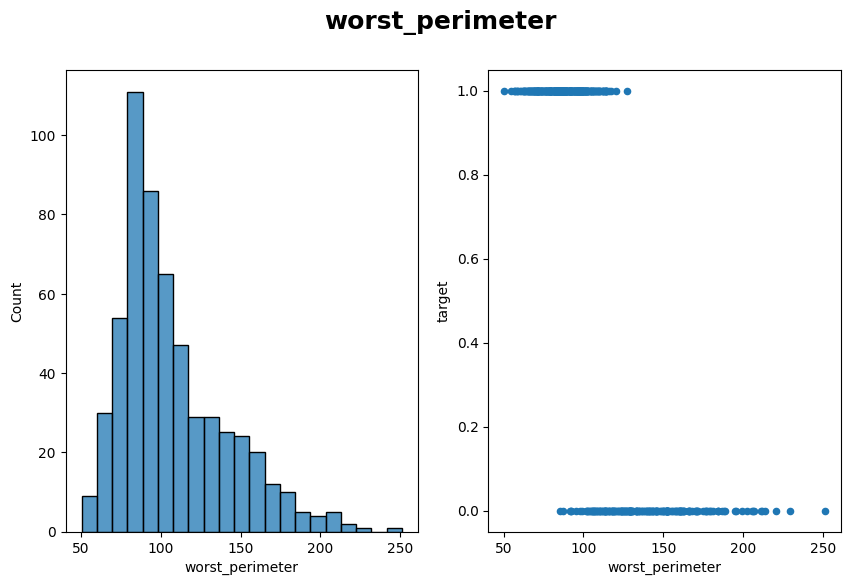

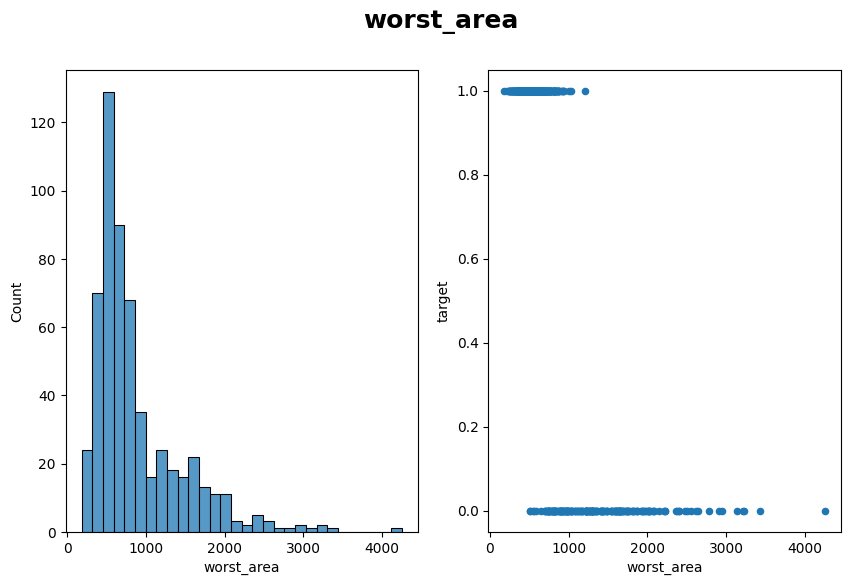

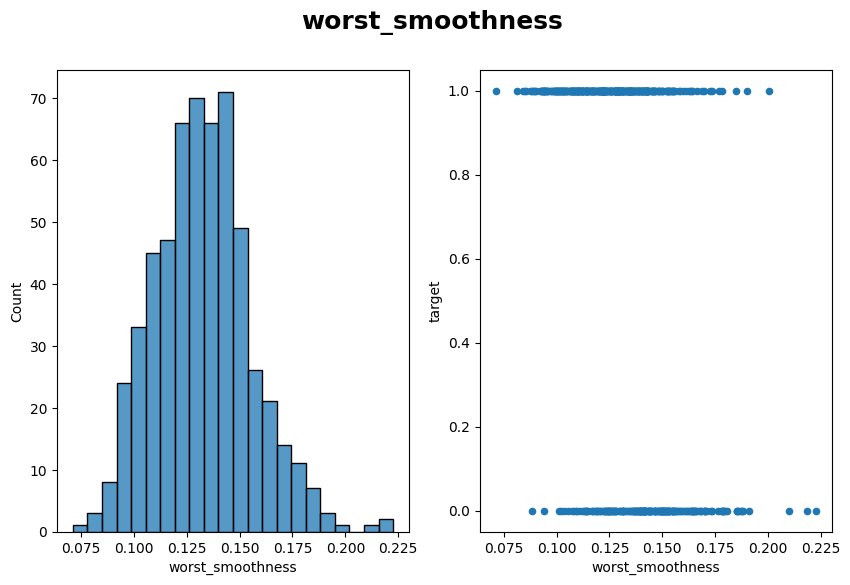

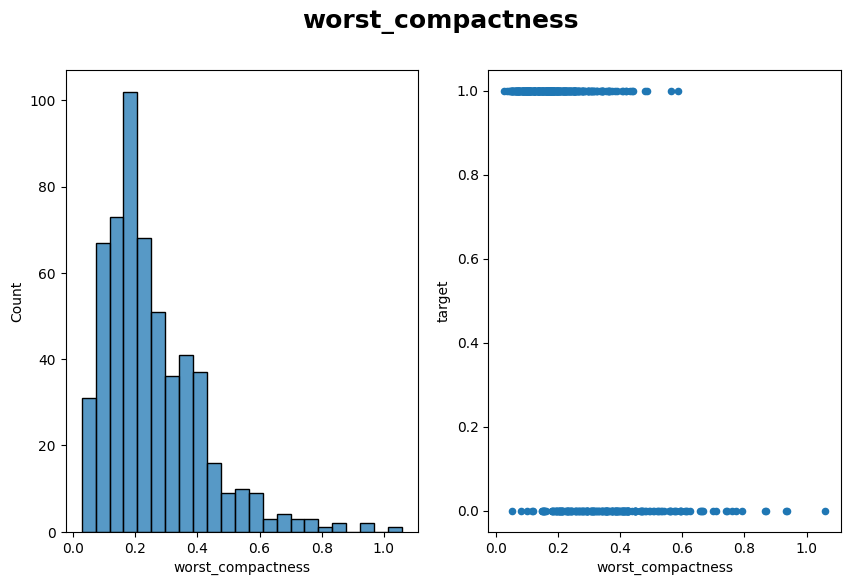

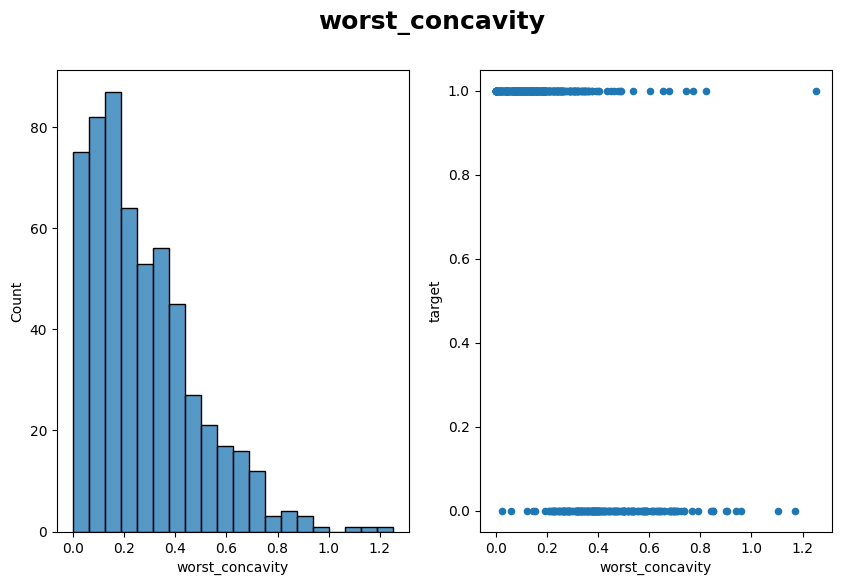

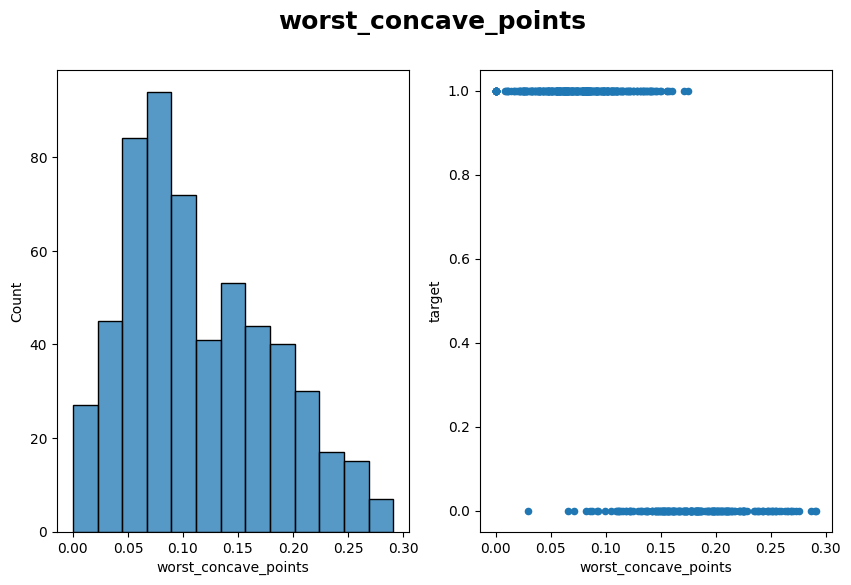

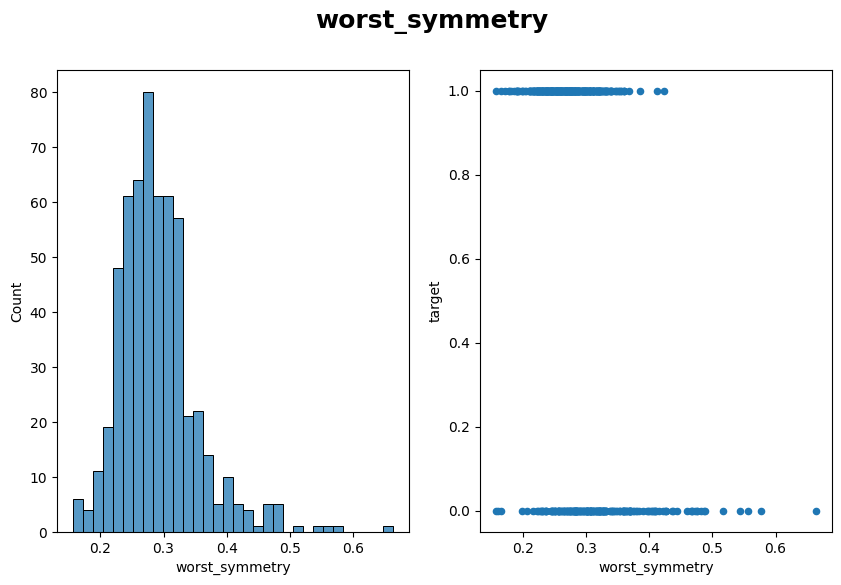

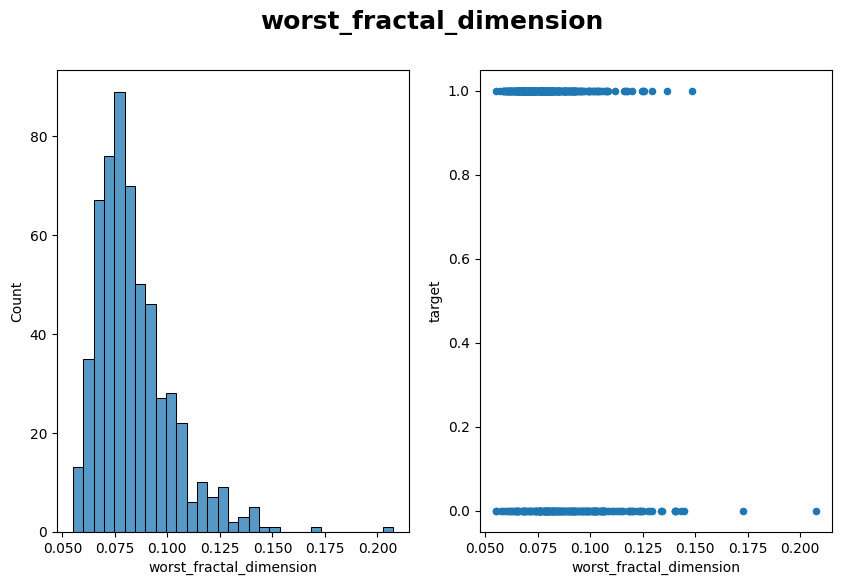

In [ ]:
columnas = np.array(data_frame.columns)

for col in columnas[:-1]:
  fig, ax = plt.subplots(1, 2, figsize=(10, 6))
  fig.suptitle(col, fontsize=18, fontweight="bold")
  sns.histplot(data_frame[col], ax=ax[0], kde=False)
  data_frame[[col]+['target']].plot.scatter(x=col, y='target', ax=ax[1])
  plt.show()

## Separación data entrenamiento y prueba

In [ ]:
# Selecciona las variables
X = data_frame.drop(["target"],axis=1)
# Rescata la etiqueta
y = data_frame.target
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29, stratify=y)

## Aplicando Machine learning

### Ideas previas

Se está tratando de elegir entre 2 clases: benigna o maligna; entonces una forma de tratar la decisión es calcular la tasa de probabilidades a posterior.

Cuando se trabaja con Naive Bayes se debe escoger un **clasificador**. Uno de los tipos de clasificadores más populares es el **Gaussian Naive Bayes Classifier**.

Hay otros clasificadores Bayesianos (https://scikit-learn.org/stable/modules/naive_bayes.html#).

La fórmula del clasificador, usando 2 clases (benigna, maligna) y 2 características (solo para explicar la fórmula): mean_radius, mean_texture.

$P(benigna|datos) = \frac{P(benigna)*P(mean\_radius|benigna)*P(mean\_texture|benigna)}{P(datos)}$

$P(maligna|datos) = \frac{P(maligna)*P(mean\_radius|maligna)*P(mean\_texture|maligna)}{P(datos)}$

donde:

+ P(benigna) es la probabilidad que ya se tiene. Corresponde al número de veces que el valor de target = 0.0 en el conjunto de datos, dividido el total de observaciones. En este caso (como ya se revisó) es 212/569

+ $P(mean\_radius|benigna), P(mean\_texture|benigna) $ es la verosimilitud.

Los nombres Gaussian y Naive (ingenuo) de algoritmo vienen de dos suposiciones:

+ Se asume que las características de la verosimilitud no están correlacionada entre ellas. Esto seria que el promedio de radio y la textura promedio son independienets entre ellos. Dado que eso no siempre puede ser cierto y es una suposición ingenua es que aparece en el nombre **naive bayes**

+ Se asume que el valor de las características (mean_radius, mean_texture y todas las que se quieran agregar) tendrán una distribución normal (gaussiana). Esto permite calcular cada parte p(mean_radius|benigna) usando la función de probabilidad de densidad normal.

### Creación, entrenamiento y prueba del modelo

In [ ]:
# Define el algoritmo a utilizar Naive Bayes
modelo = GaussianNB()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)

### Evaluación del modelo

In [ ]:
# Evaluación del modelo
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)
# Se calcula la precisión del modelo
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)

Matriz de Confusión:
[[37  5]
 [ 3 69]]
Precisión del modelo: 0.9324324324324325


In [ ]:
# Acá guardaremos los resultados
history_recall = []

In [ ]:
print("{0:<20} : {1}".format('Accurancy del modelo', accuracy_score(y_test, y_pred)))
print("{0:<20} : {1}".format('F1 score del modelo', f1_score(y_test, y_pred)))
print("{0:<20} : {1}".format('Recall del modelo', recall_score(y_test, y_pred)))

Accurancy del modelo : 0.9298245614035088
F1 score del modelo  : 0.9452054794520548
Recall del modelo    : 0.9583333333333334


In [ ]:
# Guarda el resultado para comparar
history_recall.append(recall_score(y_test, y_pred))

In [ ]:
# Obtiene el conteo de las predicciones y los valores reales
print(Counter(y_test))
print(Counter(y_pred))

Counter({1.0: 72, 0.0: 42})
Counter({np.float64(1.0): 74, np.float64(0.0): 40})


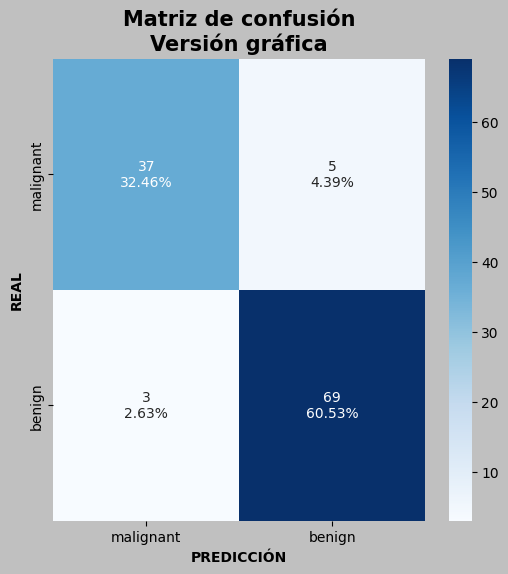

In [ ]:
# Matriz de confusión de forma gráfica
plt.figure(figsize=(6,6),facecolor= 'silver')
clases = dataset.target_names
group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión\nVersión gráfica", fontsize=15, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=10, fontweight="bold")
plt.ylabel("REAL", fontsize=10, fontweight="bold")
plt.show()

### Explicación de la matriz de confusión

La imagen muestra la estructura de la matriz de confusión:

![](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

In [ ]:
print(f"Hay {matriz[0][0] + matriz[1][1]} datos predichos correctamente")
print(f"Hay {matriz[0][1] + matriz[1][0]} datos erróneos")

Hay 106 datos predichos correctamente
Hay 8 datos erróneos


## Interpretación de resultados

Considerando la figura se interpreta la matriz de la siguiente forma:

+ Muestra maligna y el modelo la clasificó como maligna (-) . Esto sería un verdadero negativo o TN.
+ Muestra maligna y el modelo lo clasificó como benigna (+) . Este es un error tipo I, o falso positivo o FP.
+ Muestra benigna y el modelo lo clasificó como maligna (-) . Este seria un error tipo II o falso negativo o FN.
+ Muestra benigna y el modelo lo clasificó como benigna (+) . Este seria un verdadero positivo o sea un TP.

In [ ]:
tn, fp, fn, tp = matriz.ravel()
accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
precision_manual = tp/(tp+fp)
recall_manual = tp/(tp+fn)
f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
print("{0:<15}: {1}".format("Precision", precision_manual))
print("{0:<15}: {1}".format("Recall", recall_manual))
print("{0:<15}: {1}".format("F1-score", f1_score_manual))
print("{0:<15}: {1}".format("Accuracy", accuracy_manual))

Precision      : 0.9324324324324325
Recall         : 0.9583333333333334
F1-score       : 0.9452054794520548
Accuracy       : 0.9298245614035088


In [ ]:
y_pred_proba = modelo.predict_proba(X_test)
y_pred_proba.shape

(114, 2)

In [ ]:
y_pred_proba

array([[1.00000000e+000, 3.67068165e-018],
       [2.75427007e-014, 1.00000000e+000],
       [1.14872748e-017, 1.00000000e+000],
       [1.02141910e-012, 1.00000000e+000],
       [1.03530148e-016, 1.00000000e+000],
       [1.00000000e+000, 9.90145532e-029],
       [1.05832128e-018, 1.00000000e+000],
       [9.99999978e-001, 2.21257919e-008],
       [1.00000000e+000, 1.55354095e-035],
       [3.75456929e-009, 9.99999996e-001],
       [1.00000000e+000, 5.03190247e-045],
       [7.95265146e-008, 9.99999920e-001],
       [2.23576471e-011, 1.00000000e+000],
       [2.77537764e-014, 1.00000000e+000],
       [3.46999584e-007, 9.99999653e-001],
       [1.00000000e+000, 1.64773717e-046],
       [1.00000000e+000, 1.48434114e-021],
       [1.00000000e+000, 2.64178638e-011],
       [9.38712560e-018, 1.00000000e+000],
       [4.28538241e-014, 1.00000000e+000],
       [1.00000000e+000, 4.00169218e-018],
       [1.00000000e+000, 1.22119911e-015],
       [9.29697136e-013, 1.00000000e+000],
       [3.7

## Reporte de la clasificación

In [ ]:
target_names = dataset.target_names
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.93      0.88      0.90        42
      benign       0.93      0.96      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



## Observaciones

* ***Accuracy*** no funciona bien cuando las clases están desbalanceadas
* ***Precision*** nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?
* ***Recall*** nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?
* ***F1*** combina Precision y Recall en una sola medida
* La ***Matriz de Confusión*** indica qué tipos de errores se cometen

## Mejorando el modelo

### Usando un selector de columnas

Para mejorar los resultados con este algoritmo. En vez de utilizar las 30 columnas de datos de entrada que se tienen, se va a utilizar una Clase de SkLearn llamada **SelectKBest** con la que seleccionaremos las 5 mejores características y se usarán sólo esas.

In [ ]:
X = data_frame.drop(['target'], axis=1)
y = data_frame['target']
best = SelectKBest(k=3)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['mean_concave_points', 'worst_perimeter', 'worst_concave_points'], dtype='object')


### Revisión de correlación de las variables seleccionadas

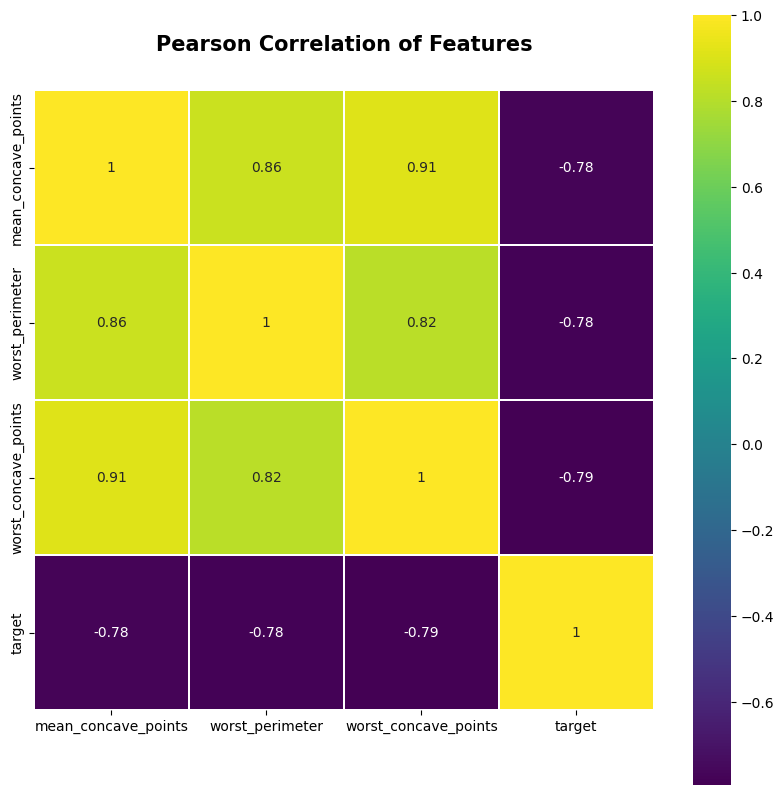

In [ ]:
used_features = X.columns[selected]
features_corr = np.append(used_features, ['target'])
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15, fontsize=15, fontweight="bold")
sns.heatmap(data_frame[features_corr].astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### Creación, entrenamiento y prueba del nuevo modelo

In [ ]:
X = data_frame[used_features]
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29, stratify=y)
# Creación del modelo
modelo_x = GaussianNB()
# Entrenamiento del modelo
modelo_x.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo_x.predict(X_test)

### Evaluación del nuevo modelo

In [ ]:
# Evaluación del modelo
matriz_x = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz_x)

Matriz de Confusión:
[[39  3]
 [ 2 70]]


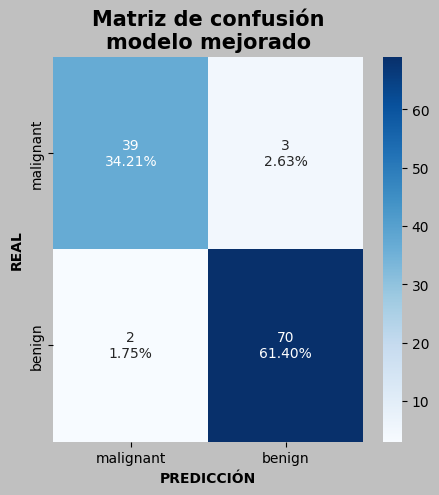

In [ ]:
plt.figure(figsize=(5,5),facecolor= 'silver')
clases = dataset.target_names
group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten()/matriz_x.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión\nmodelo mejorado", fontsize=15, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=10, fontweight="bold")
plt.ylabel("REAL", fontsize=10, fontweight="bold")
plt.show()

In [ ]:
print("{0:<20}: {1}".format('Precisión del modelo', precision_score(y_test, y_pred)))
print("{0:<20}: {1}".format('Accurancy del modelo', accuracy_score(y_test, y_pred)))
print("{0:<20}: {1}".format('F1 score del modelo', f1_score(y_test, y_pred)))
print("{0:<20}: {1}".format('Recall del modelo', recall_score(y_test, y_pred)))

Precisión del modelo: 0.958904109589041
Accurancy del modelo: 0.956140350877193
F1 score del modelo : 0.9655172413793104
Recall del modelo   : 0.9722222222222222


In [ ]:
# Guarda el resultado
history_recall.append(recall_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Comparación de modelos

In [ ]:
history_recall

[0.9583333333333334, 0.9722222222222222]

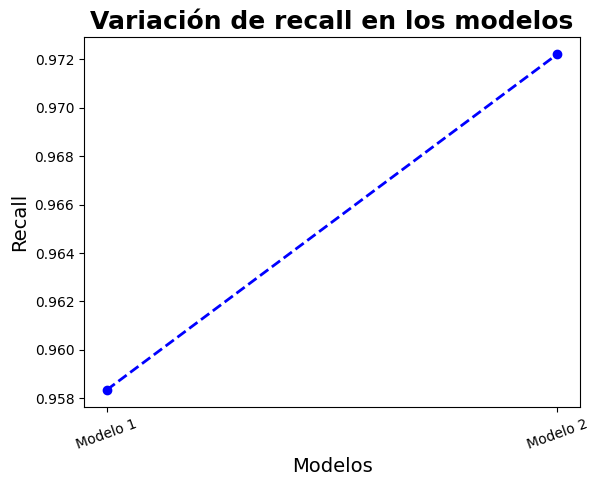

In [ ]:
plt.title("Variación de recall en los modelos", fontsize=18, fontweight="bold")
plt.xlabel("Modelos", fontsize=14); plt.ylabel("Recall", fontsize=14)
plt.xticks([0, 1], ['Modelo 1', 'Modelo 2'], rotation=20)
plt.plot(history_recall, 'bo--', linewidth=2, markersize=6);